# Test

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
from learn import *
sys.path.insert(0, 'code')
from v17 import *
from v17 import _internal_validate_predict_best_param
sys.path.insert(0, 'Pytorch-UNet/utils')
from crf import dense_crf

In [3]:
sz = 256
num_slice = 9

num_gpus = 2
gpu_start = 6
num_workers = 8
device_ids = range(gpu_start, gpu_start + num_gpus)
# device_ids = [4,5,8,9]
torch.cuda.set_device(gpu_start)
bs = 8

model_name = 'deeplab'
datapaths = ['data/train/AOI_2_Vegas_Train', 'data/train/AOI_3_Paris_Train', 'data/train/AOI_4_Shanghai_Train', 'data/train/AOI_5_Khartoum_Train']
datapath = datapaths[2]

## Preprocessing

In [4]:
# !python code/v5_im-full_rgb.py preproc_test {datapaths[0]}

In [5]:
# !python code/v5_im-full_rgb.py preproc_test {datapaths[3]}

In [6]:
# !python code/v5_im-full_rgb.py preproc_test {datapaths[0]}
# !python code/v5_im-full_rgb.py preproc_test {datapaths[2]}

## Scripting

In [1]:
%%time
%run test 2 --num_gpus=2 --gpu_start=4 --bs=8 --pred


Data finished loading: data/train/AOI_4_Shanghai_Train
CPU times: user 3h 25min 54s, sys: 17min 43s, total: 3h 43min 38s
Wall time: 6min 51s


In [2]:
def evalfscore_thresh(thresh):
    return evalfscore(datapath, preds, thresh=thresh)

In [5]:
%%time
threshs = np.linspace(0, 1, 21)
polygon_pr = []
for thresh in threshs:
#     with ThreadPoolExecutor(max_workers=8) as e:
    s = evalfscore_thresh(thresh)
    print(s)
    polygon_pr.append(s)
# plt.plot(polygon_pr)

thresh 0.0 res {'overall_fscore': 0.000805, 'tp': 9, 'fp': 1367, 'fn': 20975, 'precision': 0.006541, 'recall': 0.000429, 'fscore': 0.000805, 'min_area_th': 30, 'area_id': 4}
thresh 0.0 res {'overall_fscore': 0.000805, 'tp': 9, 'fp': 1367, 'fn': 20975, 'precision': 0.006541, 'recall': 0.000429, 'fscore': 0.000805, 'min_area_th': 60, 'area_id': 4}
thresh 0.0 res {'overall_fscore': 0.000805, 'tp': 9, 'fp': 1367, 'fn': 20975, 'precision': 0.006541, 'recall': 0.000429, 'fscore': 0.000805, 'min_area_th': 90, 'area_id': 4}
thresh 0.0 res {'overall_fscore': 0.000805, 'tp': 9, 'fp': 1367, 'fn': 20975, 'precision': 0.006541, 'recall': 0.000429, 'fscore': 0.000805, 'min_area_th': 120, 'area_id': 4}
(0.000805, 0.006541, 0.000429)
thresh 0.05 res {'overall_fscore': 0.124922, 'tp': 3689, 'fp': 34388, 'fn': 17295, 'precision': 0.096883, 'recall': 0.175801, 'fscore': 0.124922, 'min_area_th': 30, 'area_id': 4}
thresh 0.05 res {'overall_fscore': 0.143819, 'tp': 3684, 'fp': 26563, 'fn': 17300, 'precision

thresh 0.55 res {'overall_fscore': 0.0456, 'tp': 597, 'fp': 4603, 'fn': 20387, 'precision': 0.114808, 'recall': 0.02845, 'fscore': 0.0456, 'min_area_th': 120, 'area_id': 4}
(0.0456, 0.114808, 0.02845)
thresh 0.6000000000000001 res {'overall_fscore': 0.029099, 'tp': 416, 'fp': 7192, 'fn': 20568, 'precision': 0.054679, 'recall': 0.019825, 'fscore': 0.029099, 'min_area_th': 30, 'area_id': 4}
thresh 0.6000000000000001 res {'overall_fscore': 0.031099, 'tp': 416, 'fp': 5353, 'fn': 20568, 'precision': 0.07211, 'recall': 0.019825, 'fscore': 0.031099, 'min_area_th': 60, 'area_id': 4}
thresh 0.6000000000000001 res {'overall_fscore': 0.032069, 'tp': 416, 'fp': 4544, 'fn': 20568, 'precision': 0.083871, 'recall': 0.019825, 'fscore': 0.032069, 'min_area_th': 90, 'area_id': 4}
thresh 0.6000000000000001 res {'overall_fscore': 0.032684, 'tp': 416, 'fp': 4056, 'fn': 20568, 'precision': 0.093023, 'recall': 0.019825, 'fscore': 0.032684, 'min_area_th': 120, 'area_id': 4}
(0.032684, 0.093023, 0.019825)
thre

In [6]:
fscore = [o[0] for o in polygon_pr]

0.15 0.285962


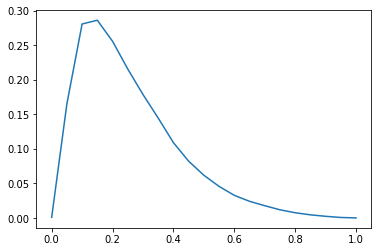

In [7]:
plt.plot(threshs, fscore)
plt.xlabel = 'threshold'
plt.ylabel = 'fscore'
print(np.argmax(fscore) / 20, fscore[np.argmax(fscore)])

In [ ]:
fscore = [o[0] for o in polygon_pr]

plt.plot(threshs, fscore)
plt.xlabel = 'threshold'
plt.ylabel = 'fscore'
print(np.argmax(fscore) / 20, fscore[np.argmax(fscore)])

# Postprocessing

In [7]:
# !python code/v17.py data/train/AOI_2_Vegas_Train data/train/AOI_3_Paris_Train data/train/AOI_4_Shanghai_Train data/train/AOI_5_Khartoum_Train

## evalfscore

In [8]:
model_name = 'deeplab'
data = None
is_eval, is_pred = True, False

In [9]:
learn, denorm, data = learner_on_dataset(datapath, bs, device_ids, num_workers, model_name='deeplab',
                                         debug=False, data=data, num_slice=num_slice, sz=sz,
                                        is_eval=is_eval, is_pred=is_pred)
(trn_x,trn_y), (val_x,val_y) = data
learn.load('deeplab-shanghai')


Data finished loading: data/train/AOI_4_Shanghai_Train


In [10]:
%%time
preds = learn.predict().squeeze()

CPU times: user 2h 28min 49s, sys: 14min 21s, total: 2h 43min 11s
Wall time: 8min 20s


In [11]:
evalfscore(datapath, preds)

(0.202944, 0.040078)

In [87]:
%%time
with ThreadPoolExecutor(max_workers=8) as e:
    x, y = list(zip(*list(e.map(learn.data.val_dl.get_batch, [[o] for o in range(preds.shape[0])]))))
x, y, preds = [np.squeeze(o) for o in (x, y, preds)]
x = denorm(np.array(list(x)))
print(preds.shape)

(12375, 256, 256)
CPU times: user 3min 25s, sys: 1min 48s, total: 5min 14s
Wall time: 1min 25s


In [94]:
scores = None

In [93]:
preds.shape

(12375, 256, 256)

[0.25262 0.25283 0.25288 0.25346 0.25391 0.25426 0.25451 0.25477 0.25537]


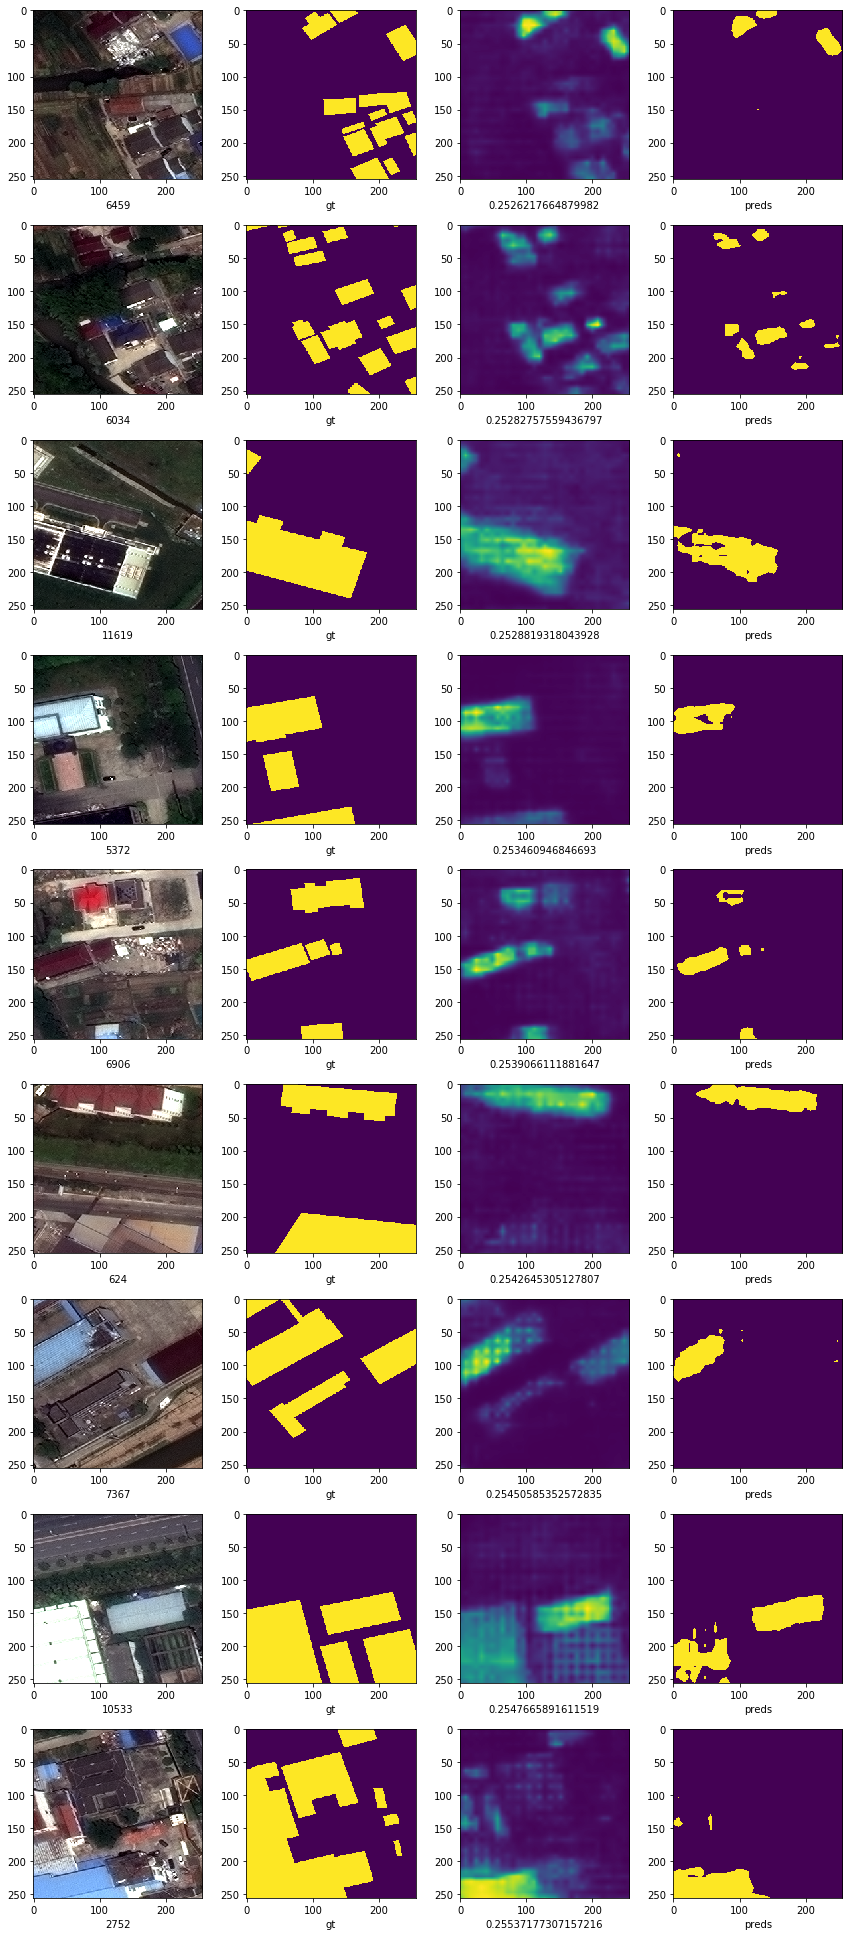

In [98]:
scores, idx = plot_worse_preds(x, y, preds, fscore, shift=6000,
                          scores=scores, is_best=0, thresh=0.4)

## testproc

In [16]:
data = None
is_eval, is_pred = False, True

In [17]:
learn, denorm, data = learner_on_dataset(datapath, bs, device_ids, num_workers, model_name='deeplab',
                                         debug=False, data=data, num_slice=num_slice, sz=sz,
                                        is_eval=is_eval, is_pred=is_pred)
(trn_x,trn_y), (val_x,val_y) = data
learn.load('deeplab-shanghai')

Data finished loading: data/train/AOI_4_Shanghai_Train


In [ ]:
%%time
preds = learn.predict().squeeze()

In [ ]:
testproc(datapath, preds)

In [52]:
preds_big = _internal_validate_predict_best_param(3, slice_pred_list=[preds])
x_big = _internal_validate_predict_best_param(3, slice_pred_list=[denorm(x)])
y_big = _internal_validate_predict_best_param(3, slice_pred_list=[y])
x_big[0].shape

(650, 650, 3)

In [ ]:
idx = 89
data_im = zip(preds_big[idx:idx + 9], x_big[idx:idx + 9], y_big[idx:idx + 9], )
plot_ims(data_im, figsize=4)

In [24]:
scores = None

In [45]:
y_big.shape

(345, 650, 650)

[0.49895 0.51091 0.51635 0.54636 0.54786 0.5628  0.58152 0.58209 0.58652]


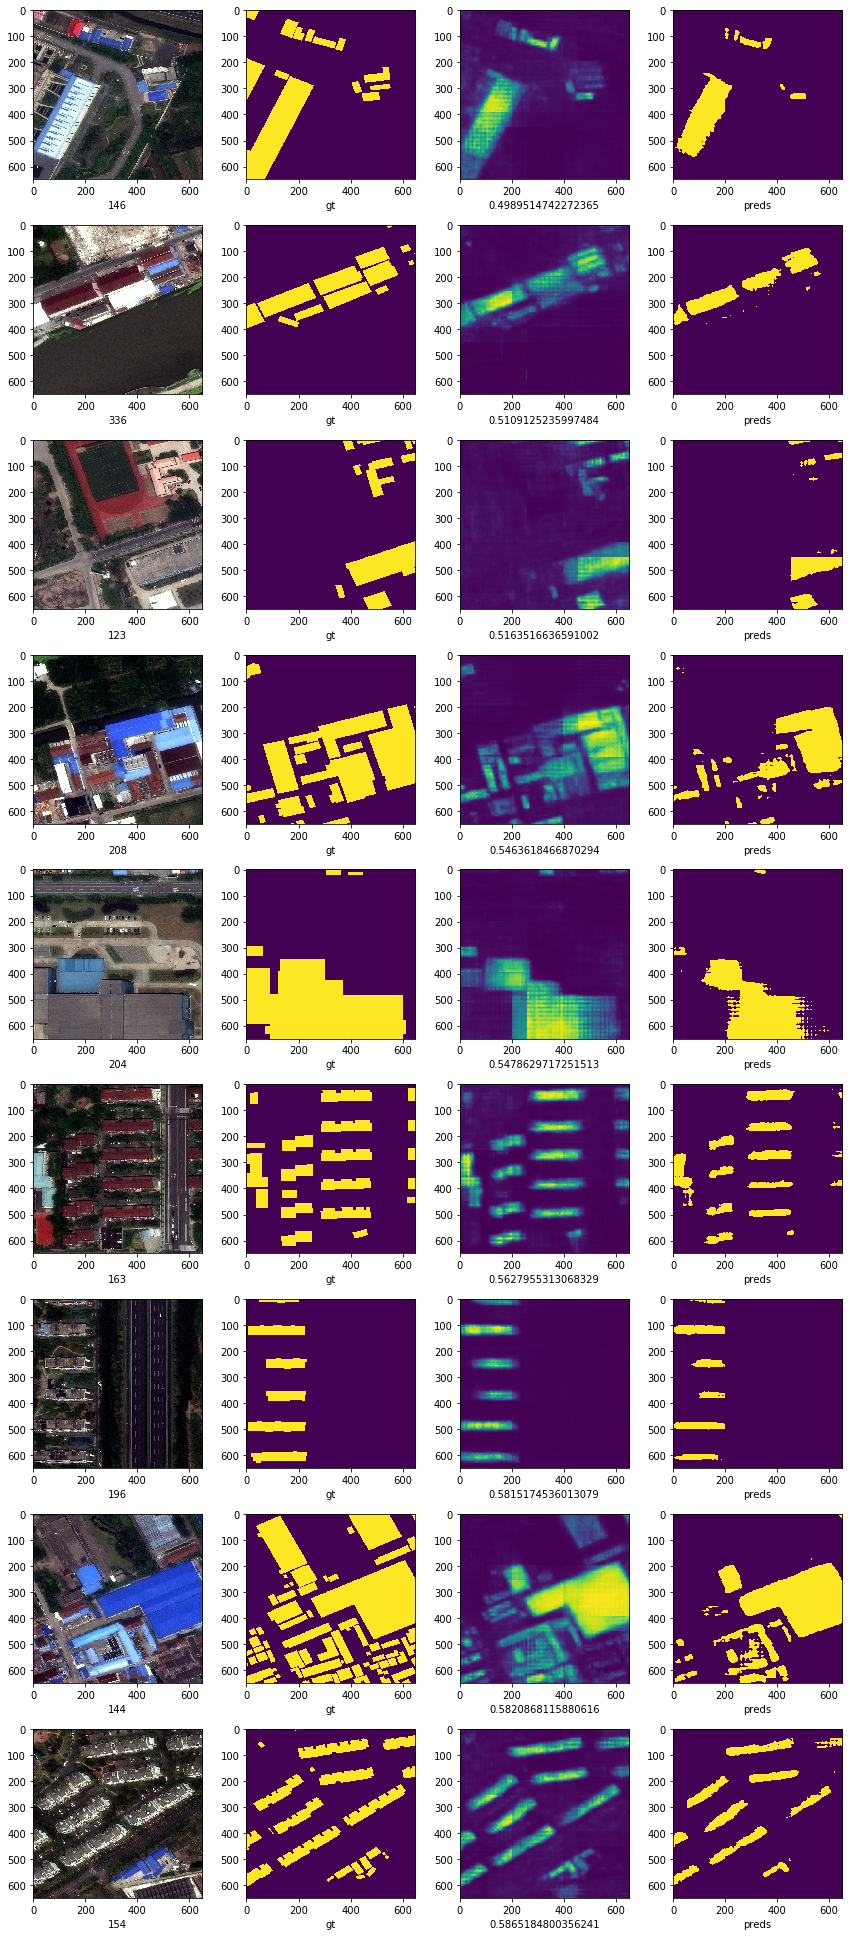

In [60]:
shift = 260
scores, idx = plot_worse_preds(x_big, y_big, preds_big, fscore, scores=scores, shift=shift, thresh=0.4)

In [53]:
%%time
threshs = np.linspace(0, 1, 20)
# preds_big, y_big = T(preds_big).float(), T(y_big).float()
with ThreadPoolExecutor(max_workers=8) as e:
    gen = list(e.map(partial(pr_np, preds_big, y_big), threshs))

CPU times: user 59 s, sys: 49.8 s, total: 1min 48s
Wall time: 10.8 s


In [88]:
np.save('gen_shanghai.npy', gen)

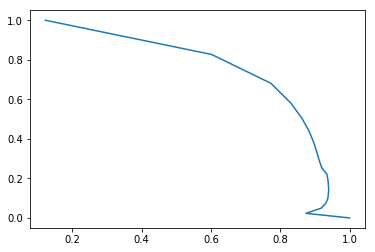

In [55]:
plt.plot(*zip(*gen))

In [56]:
distance = [o[0] - o[1] for o in score]

In [57]:
np.argmin(np.abs(distance)) / 20 

0.4